In [1]:
from tqdm.notebook import tqdm 
from binance.client import Client
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Setting up Binance Client
client=Client(API_KEY, API_SECRET_KEY)

In [3]:
#downloading data from binance from 1 jan 2021 to 2 may 2021 with time interval of 15 mins
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_15MINUTE, "1 Jan, 2021", "2 May, 2021")


In [4]:
#creating dataframe to store the dowloaded historical data with columns as given
df=pd.DataFrame(columns=['time','open','close', 'high','low','volume','numtrades'])

In [5]:
#adding required data in the form of rows to dataframe while looping through historical data
for i in tqdm(range(len(klines))):
    data=klines[i]
    df=df.append({'time':data[0],
                  'open':data[1],
                  'close':data[4], 
                  'high':data[2],
                  'low':data[3],
                  'volume':data[5],
                  'numtrades':data[8]}, ignore_index=True)

In [6]:
#stored the dowloaded data in the form of a csv file inside the pc
df.to_csv('./data_btcusdt_15min.csv')

In [7]:
df

,time,open,close,high,low,volume,numtrades
0,1609459200000,28923.63000000,28752.80000000,29017.50000000,28690.17000000,840.07756900,19318
1,1609460100000,28752.80000000,28836.63000000,28875.55000000,28720.91000000,480.61117900,13876
2,1609461000000,28836.63000000,28930.11000000,28943.87000000,28836.62000000,471.13470800,12234
3,1609461900000,28930.11000000,28995.13000000,29031.34000000,28889.99000000,519.98798900,12961
4,1609462800000,28995.13000000,29382.59000000,29385.00000000,28960.35000000,1735.83900500,32696
...,...,...,...,...,...,...,...
11573,1619910000000,57660.31000000,57634.32000000,57675.38000000,57580.70000000,237.50242600,11208
11574,1619910900000,57634.33000000,57848.69000000,57857.98000000,57630.64000000,351.22628600,11465
11575,1619911800000,57848.70000000,57879.75000000,57939.00000000,57752.14000000,378.26841000,11425
11576,1619912700000,57879.75000000,57800.37000000,57879.75000000,57751.35000000,242.30896900,9366


In [9]:
#adding a new column "MA" which stores the values as calculated moving average 
df['MA_13'] = df.close.rolling(window=13).mean()
df['MA_21'] = df.close.rolling(window=21).mean()

In [13]:
#converting unix time to date time
df['ftime'] = df.time.apply(lambda x: datetime.utcfromtimestamp(int(x)/1000).strftime('%Y-%m-%d %H:%M:%S'))

In [14]:
df.head()

,time,open,close,high,low,volume,numtrades,MA_13,MA_21,ftime
0,1609459200000,28923.63000000,28752.80000000,29017.50000000,28690.17000000,840.07756900,19318,NaN,NaN,2021-01-01 00:00:00
1,1609460100000,28752.80000000,28836.63000000,28875.55000000,28720.91000000,480.61117900,13876,NaN,NaN,2021-01-01 00:15:00
2,1609461000000,28836.63000000,28930.11000000,28943.87000000,28836.62000000,471.13470800,12234,NaN,NaN,2021-01-01 00:30:00
3,1609461900000,28930.11000000,28995.13000000,29031.34000000,28889.99000000,519.98798900,12961,NaN,NaN,2021-01-01 00:45:00
4,1609462800000,28995.13000000,29382.59000000,29385.00000000,28960.35000000,1735.83900500,32696,NaN,NaN,2021-01-01 01:00:00


In [15]:
#setting the index of the dataframe as date and time 
df.set_index('ftime', inplace = True)

In [16]:
df.head()

,time,open,close,high,low,volume,numtrades,MA_13,MA_21
ftime,,,,,,,,,
2021-01-01 00:00:00,1609459200000,28923.63000000,28752.80000000,29017.50000000,28690.17000000,840.07756900,19318,NaN,NaN
2021-01-01 00:15:00,1609460100000,28752.80000000,28836.63000000,28875.55000000,28720.91000000,480.61117900,13876,NaN,NaN
2021-01-01 00:30:00,1609461000000,28836.63000000,28930.11000000,28943.87000000,28836.62000000,471.13470800,12234,NaN,NaN
2021-01-01 00:45:00,1609461900000,28930.11000000,28995.13000000,29031.34000000,28889.99000000,519.98798900,12961,NaN,NaN
2021-01-01 01:00:00,1609462800000,28995.13000000,29382.59000000,29385.00000000,28960.35000000,1735.83900500,32696,NaN,NaN


In [17]:
df.index = pd.to_datetime(df.index)

In [18]:
df.head()

,time,open,close,high,low,volume,numtrades,MA_13,MA_21
ftime,,,,,,,,,
2021-01-01 00:00:00,1609459200000,28923.63000000,28752.80000000,29017.50000000,28690.17000000,840.07756900,19318,NaN,NaN
2021-01-01 00:15:00,1609460100000,28752.80000000,28836.63000000,28875.55000000,28720.91000000,480.61117900,13876,NaN,NaN
2021-01-01 00:30:00,1609461000000,28836.63000000,28930.11000000,28943.87000000,28836.62000000,471.13470800,12234,NaN,NaN
2021-01-01 00:45:00,1609461900000,28930.11000000,28995.13000000,29031.34000000,28889.99000000,519.98798900,12961,NaN,NaN
2021-01-01 01:00:00,1609462800000,28995.13000000,29382.59000000,29385.00000000,28960.35000000,1735.83900500,32696,NaN,NaN


In [20]:
#creating  a new dataframe of trade_history with its columns as given
trade_history=pd.DataFrame(columns=["entry","exit","entryprice",'exitprice','profit','balance'])

In [21]:
#executing the moving average crossover strategy 
intrade = False
entrytime=None
balance=1
entryprice = None
exitprice = None
profit = []
for index, row in df[21:].iterrows():
    if float(row['MA_13']) > float(row['MA_21']) and not intrade:
        intrade = True
        entryprice = float(row['close'])
        entrytime=index
    elif float(row['MA_13'])<float(row['MA_21']) and intrade:
        intrade = False
        exitprice = float(row['close'])
        profit=(float(exitprice)-float(entryprice))/float(entryprice)
        balance*=(1+profit)
        trade_history=trade_history.append({"entry":entrytime,
                              "exit":index,
                              "entryprice":entryprice,
                              'exitprice':exitprice,
                              'profit':profit,
                              'balance':balance},ignore_index=True)
        

In [23]:
trade_history

,entry,exit,entryprice,exitprice,profit,balance
0,2021-01-01 05:15:00,2021-01-01 05:30:00,29161.28,29178.57,0.000593,1.000593
1,2021-01-01 10:30:00,2021-01-01 16:15:00,29266.48,29277.11,0.000363,1.000956
2,2021-01-01 22:00:00,2021-01-02 03:15:00,29233.91,29312.24,0.002679,1.003638
3,2021-01-02 03:30:00,2021-01-02 11:45:00,29281.40,29755.00,0.016174,1.019871
4,2021-01-02 12:15:00,2021-01-02 21:00:00,30289.70,31464.03,0.038770,1.059412
...,...,...,...,...,...,...
313,2021-04-29 21:45:00,2021-04-30 12:15:00,53329.20,54471.99,0.021429,0.975213
314,2021-04-30 13:30:00,2021-04-30 20:00:00,55340.47,56863.96,0.027529,1.002060
315,2021-04-30 20:45:00,2021-05-01 06:00:00,56757.34,58000.00,0.021894,1.023999
316,2021-05-01 12:30:00,2021-05-01 15:15:00,57863.21,57124.44,-0.012768,1.010925


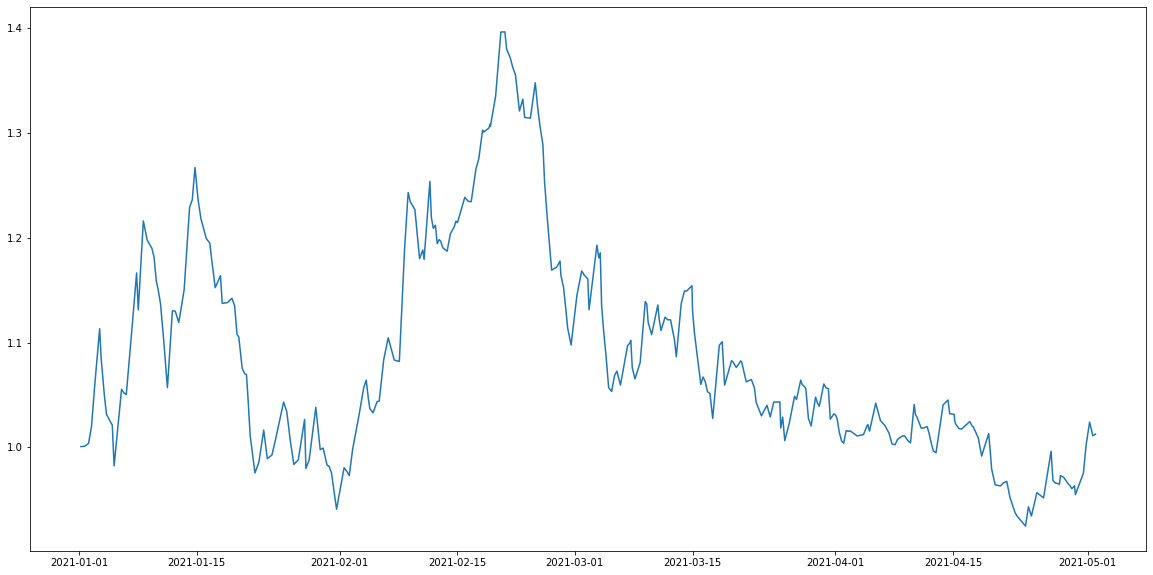

In [24]:
#plot of balance over time
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(trade_history.exit, trade_history.balance)
plt.show()

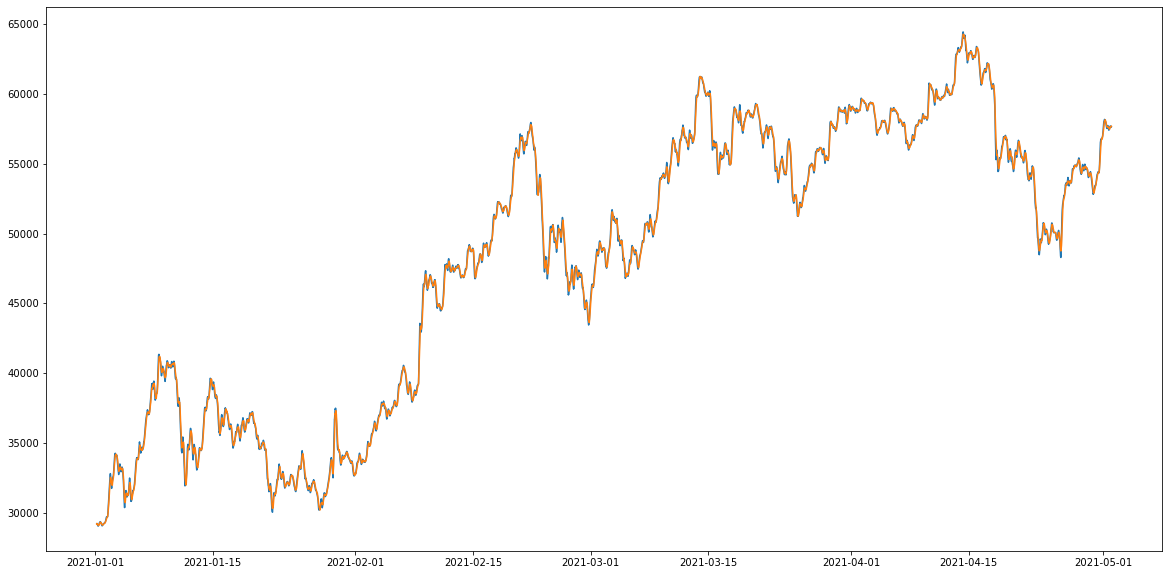

In [25]:
#plot of moving average with windows as 13 and windowas as 21 with time
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(df[21:].index, df[21:].MA_13)
plt.plot(df[21:].index, df[21:].MA_21)
plt.show()